In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

# Dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/magic/

In [ ]:
pd.read_csv("magic04.data")

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

In [ ]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'] 
df = pd.read_csv("magic04.data", names=cols) # Assign col names to the dataset
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'].unique() # g = gammas , h = hadrons

array(['g', 'h'], dtype=object)

In [ ]:
df['class'] = (df['class']=='g').astype(int) # Convert class to int
#df.head()

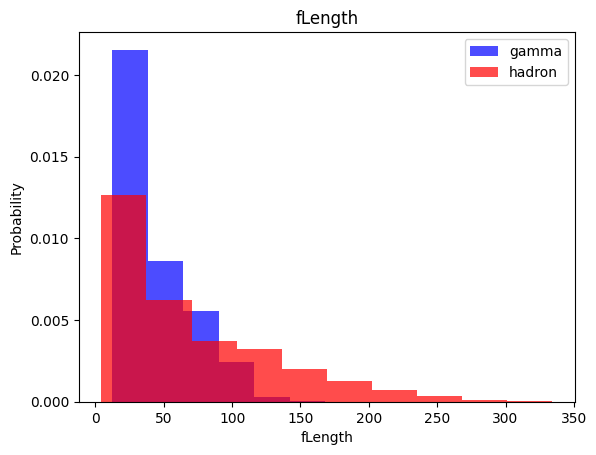

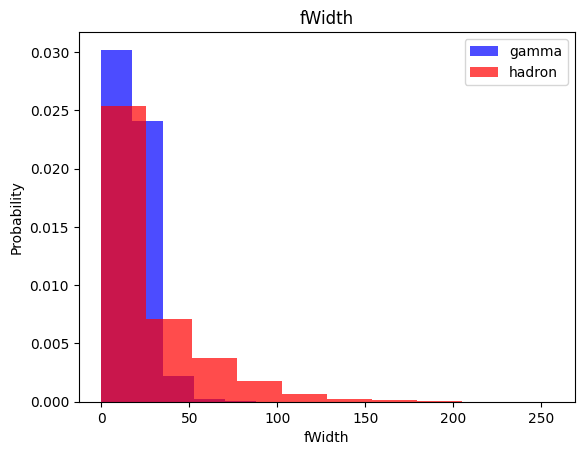

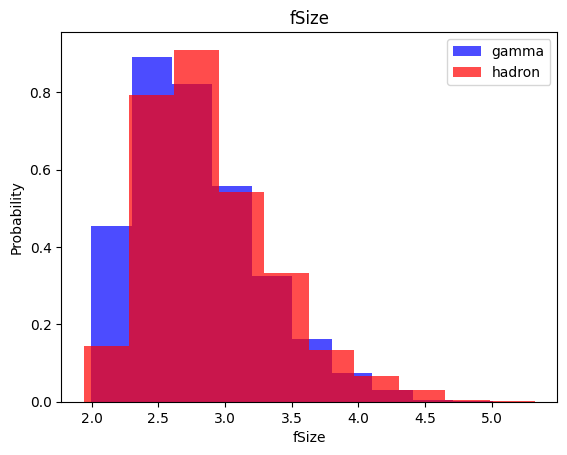

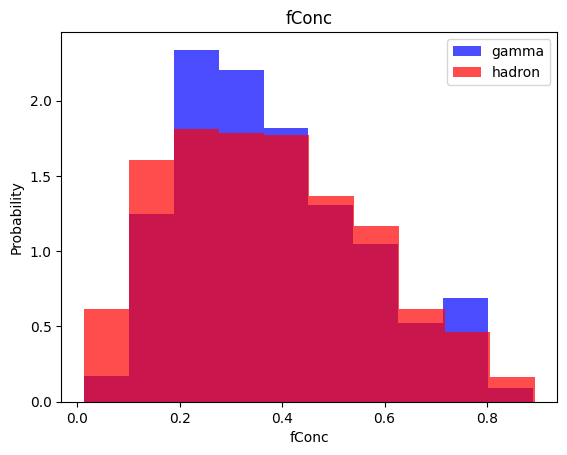

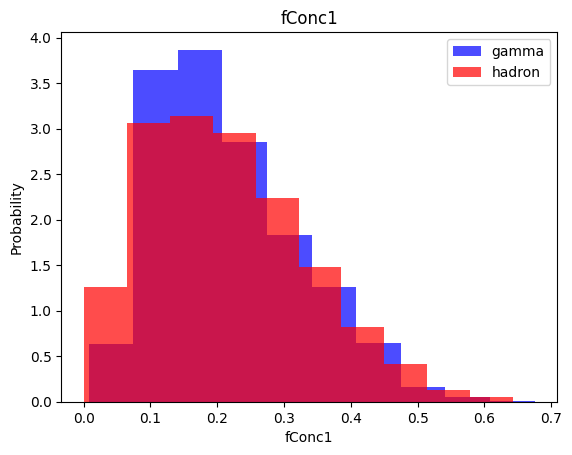

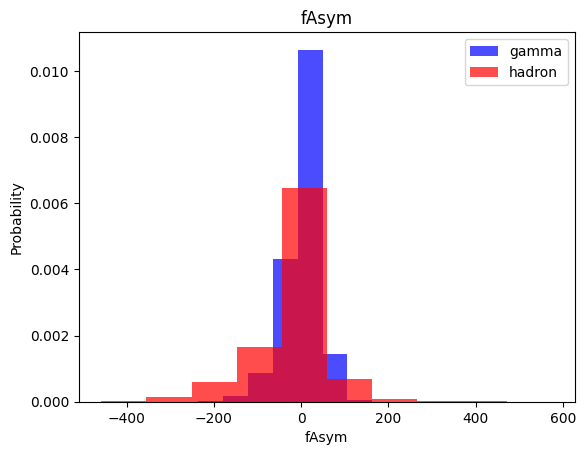

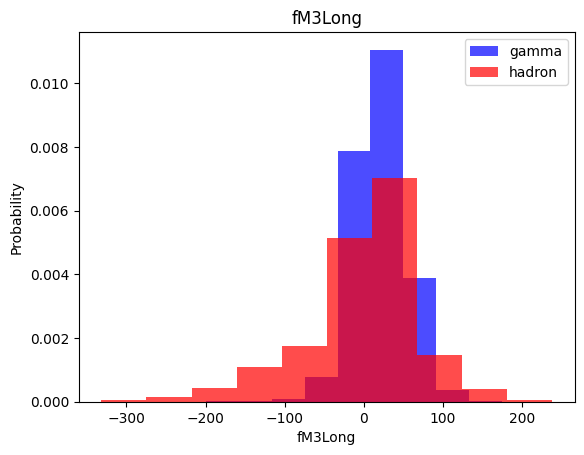

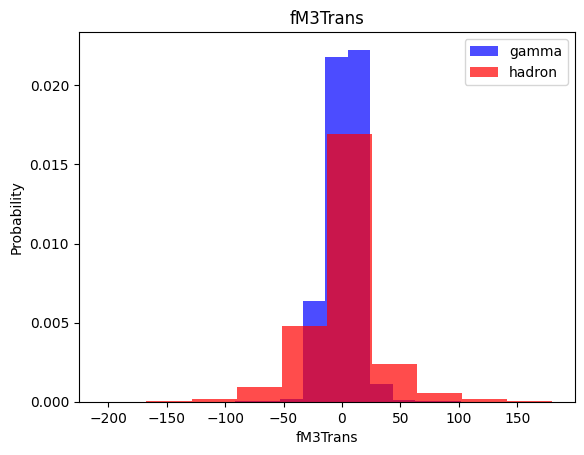

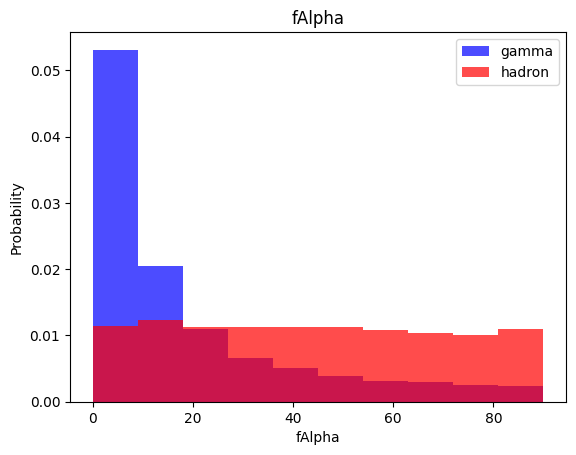

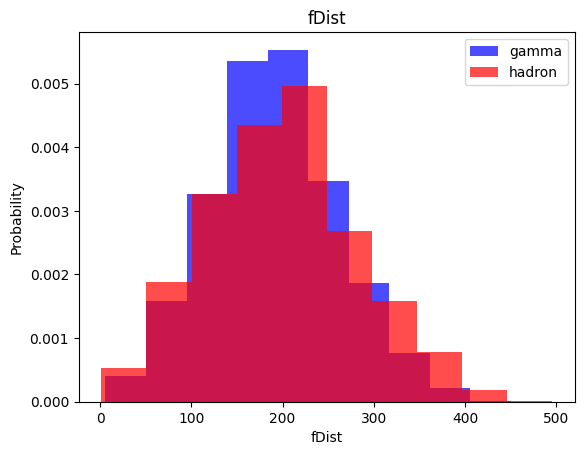

In [ ]:
# Histogram for gamma vs hadrons
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Split the data into training, validation and testing sets
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, over_sample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if over_sample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
# There seems to be an imbalance in the sampling, where there is an uneven distribution of no. of Gammas and Hadrons. 
print('Gammas: ', len(train[train['class']==1]))
print('Hadrons: ', len(train[train['class']==0]))

# Make use of RandonOverSampler() to re-distribute the Gammas and Hadrons equivalently in the train datasets

Gammas:  7402
Hadrons:  4010


In [ ]:
train, X_train, y_train = scale_dataset(train, over_sample=True)

In [ ]:
print('Gammas: ', sum(y_train==1))
print('Hadrons: ', sum(y_train==0))

Gammas:  7402
Hadrons:  7402


In [ ]:
valid, X_valid, y_valid = scale_dataset(valid, over_sample=False)
test, X_test, y_test = scale_dataset(test, over_sample=False)

# K-NN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1341
           1       0.85      0.85      0.85      2463

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1341
           1       0.74      0.89      0.80      2463

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [ ]:
log_model = LogisticRegression() # Default l2 penalty
log_model = log_model.fit(X_train, y_train)

In [ ]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1341
           1       0.84      0.81      0.83      2463

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [ ]:
svc_model = SVC() # Default l2 penalty
svc_model = svc_model.fit(X_train, y_train)

In [ ]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1341
           1       0.88      0.89      0.89      2463

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax1.grid(True)

  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def train_nn_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):

  nn_model = tf.keras.Sequential([
                                  tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
                                  tf.keras.layers.Dropout(dropout_prob),
                                  tf.keras.layers.Dense(num_nodes, activation='relu'),
                                  tf.keras.layers.Dropout(dropout_prob),
                                  tf.keras.layers.Dense(1, activation='sigmoid'),
                                  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(
    X_train, 
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose = 0
  )

  return nn_model, history

16: nodes, 0: dropout, 0.01: learning_rate, 32: batch_size


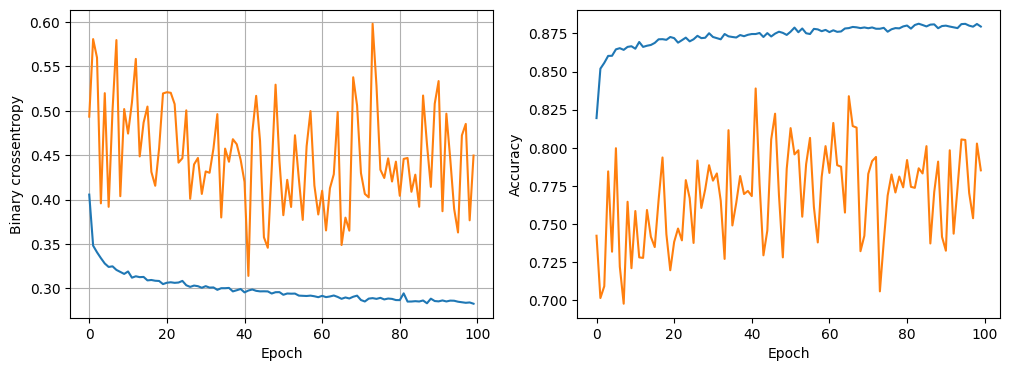

119/119 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8751
16: nodes, 0: dropout, 0.01: learning_rate, 64: batch_size


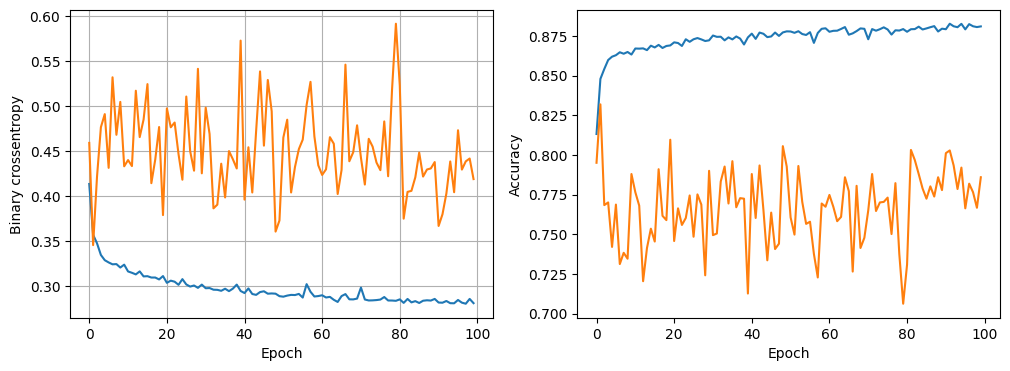

119/119 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8759
16: nodes, 0: dropout, 0.01: learning_rate, 128: batch_size


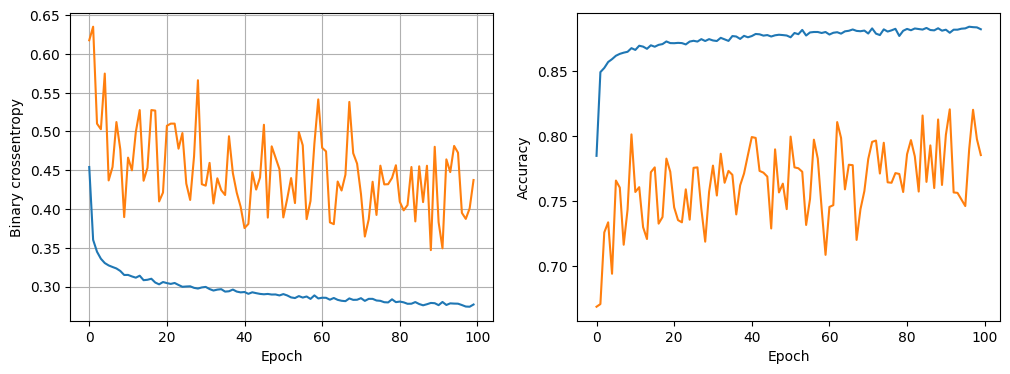

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8712
16: nodes, 0: dropout, 0.005: learning_rate, 32: batch_size


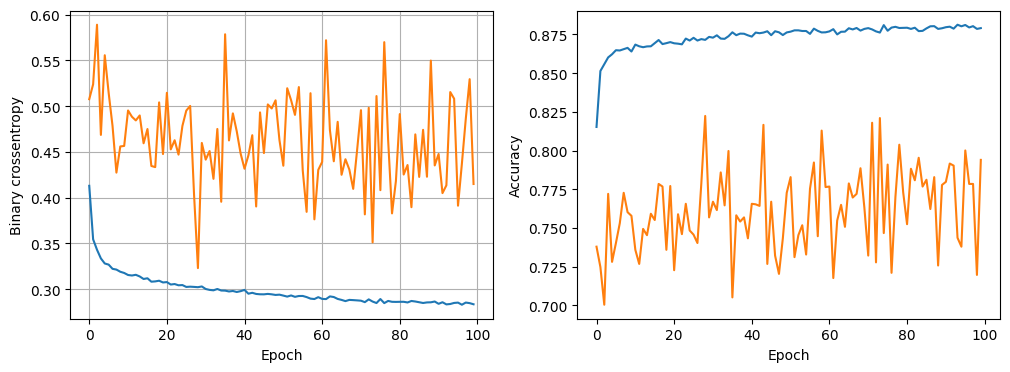

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8701
16: nodes, 0: dropout, 0.005: learning_rate, 64: batch_size


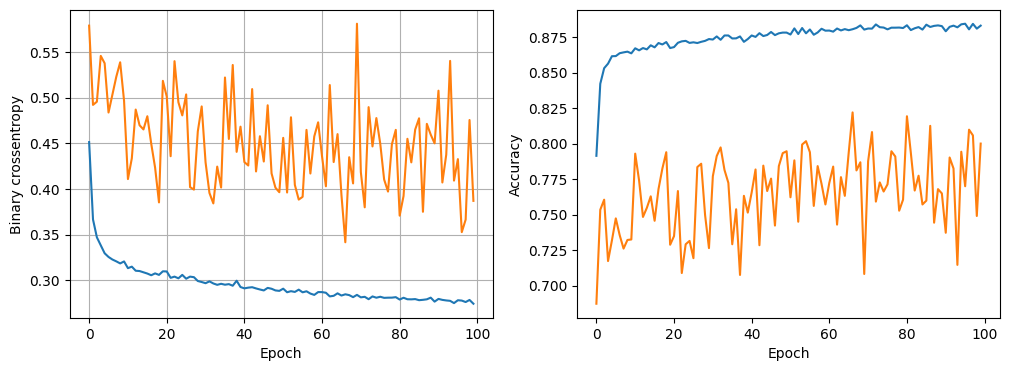

119/119 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8717
16: nodes, 0: dropout, 0.005: learning_rate, 128: batch_size


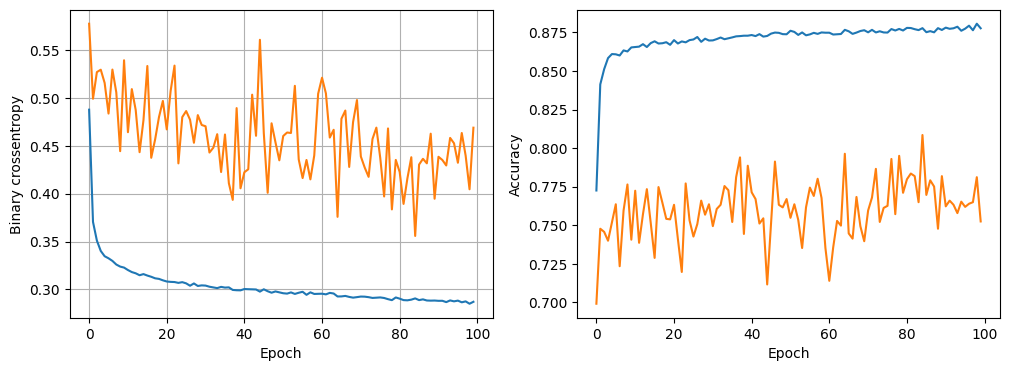

119/119 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8725
16: nodes, 0: dropout, 0.001: learning_rate, 32: batch_size


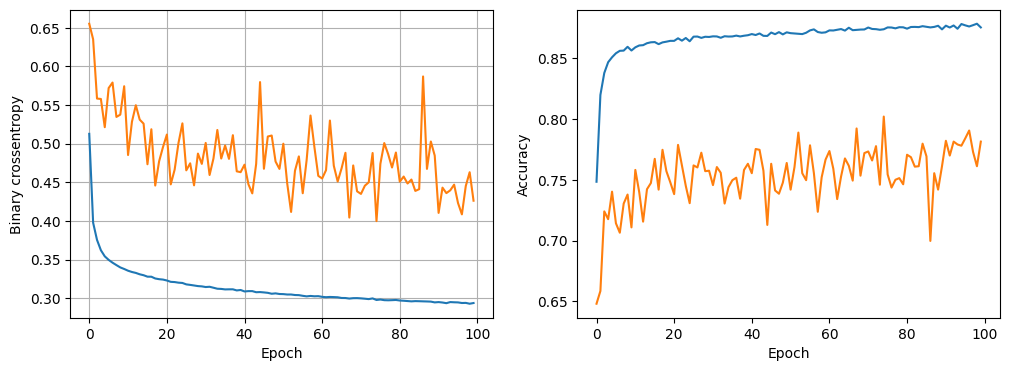

119/119 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8699
16: nodes, 0: dropout, 0.001: learning_rate, 64: batch_size


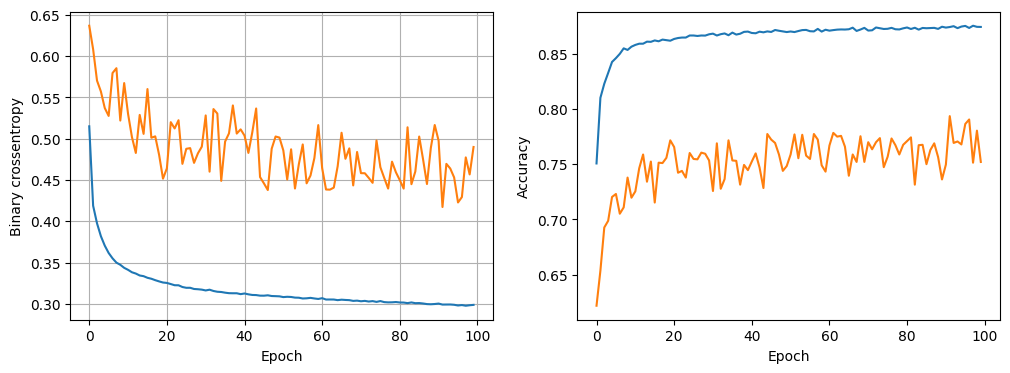

119/119 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8720
16: nodes, 0: dropout, 0.001: learning_rate, 128: batch_size


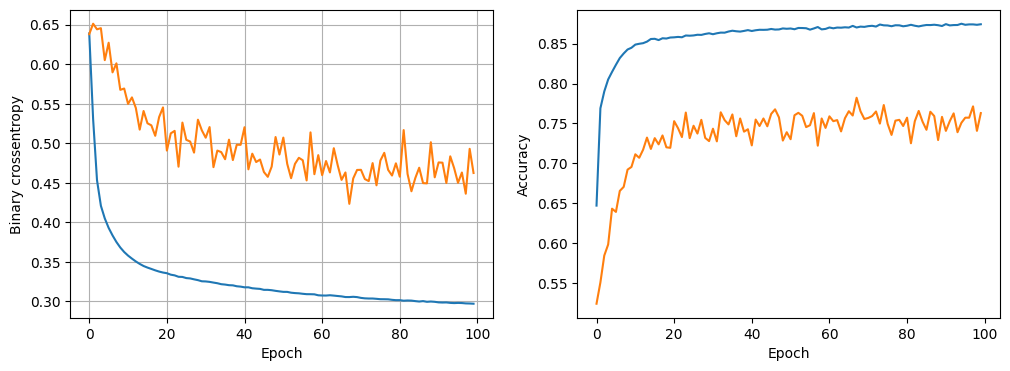

119/119 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8767
16: nodes, 0.2: dropout, 0.01: learning_rate, 32: batch_size


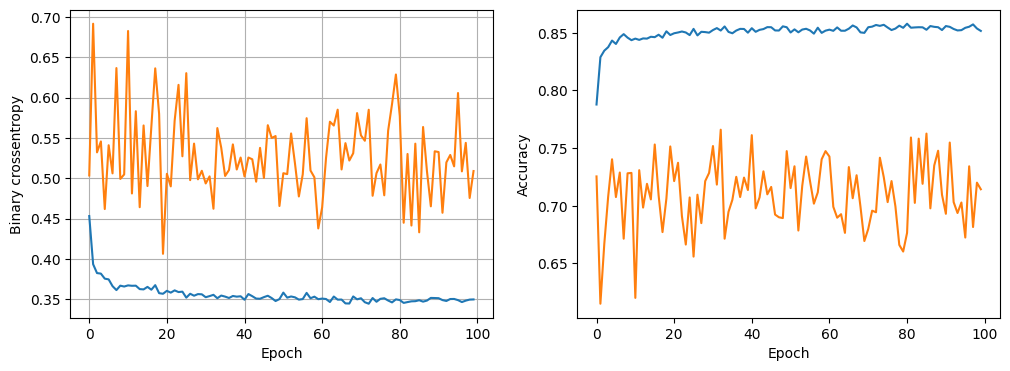

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8617
16: nodes, 0.2: dropout, 0.01: learning_rate, 64: batch_size


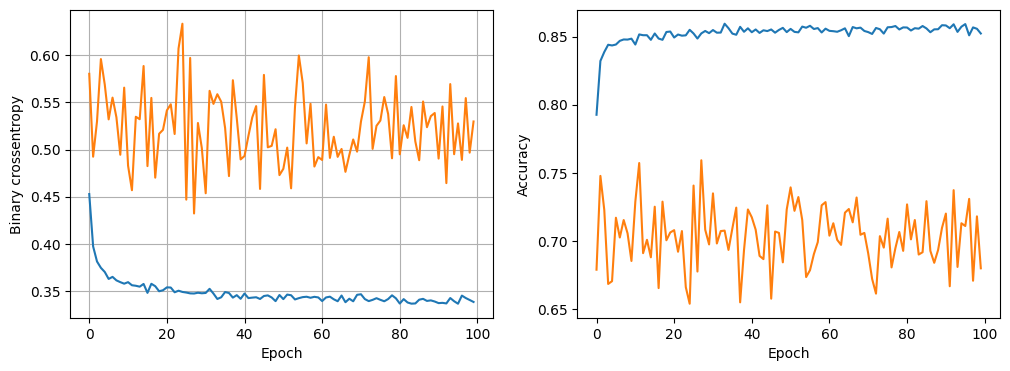

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8667
16: nodes, 0.2: dropout, 0.01: learning_rate, 128: batch_size


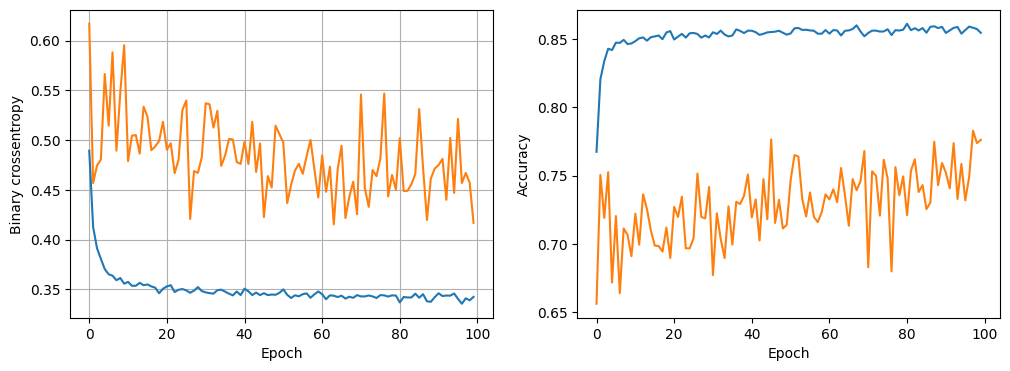

119/119 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8686
16: nodes, 0.2: dropout, 0.005: learning_rate, 32: batch_size


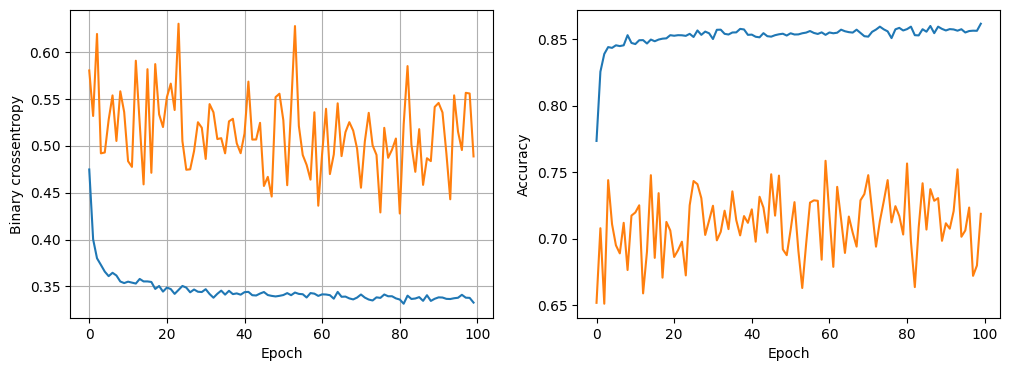

119/119 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8728
16: nodes, 0.2: dropout, 0.005: learning_rate, 64: batch_size


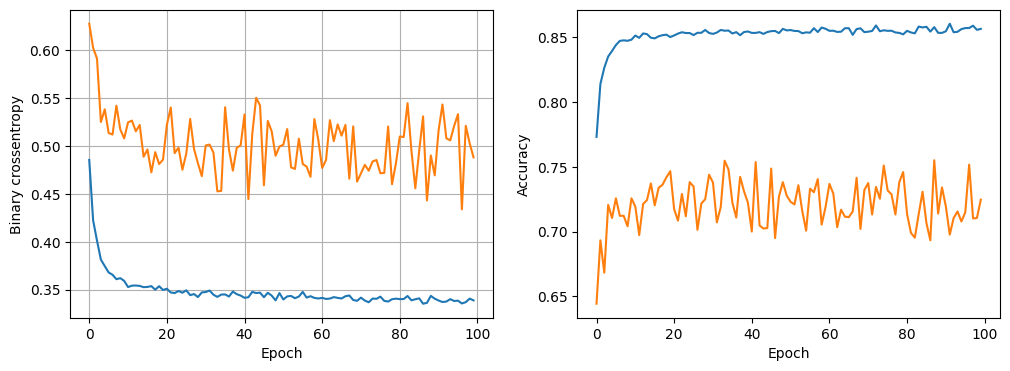

119/119 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8728
16: nodes, 0.2: dropout, 0.005: learning_rate, 128: batch_size


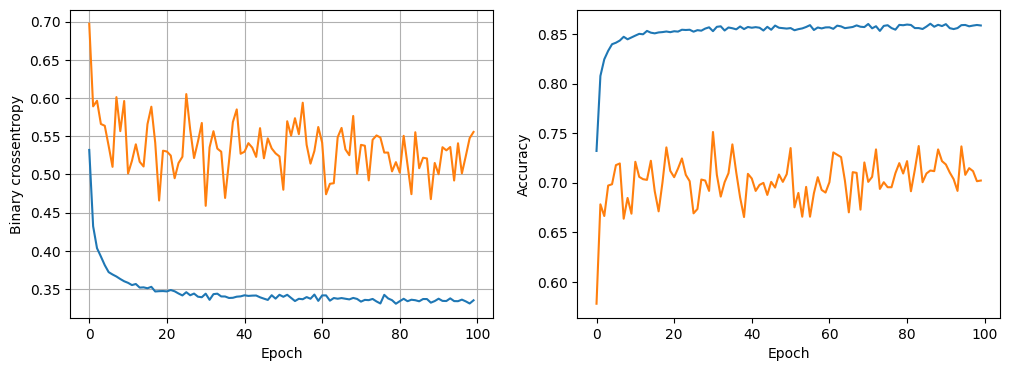

119/119 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8699
16: nodes, 0.2: dropout, 0.001: learning_rate, 32: batch_size


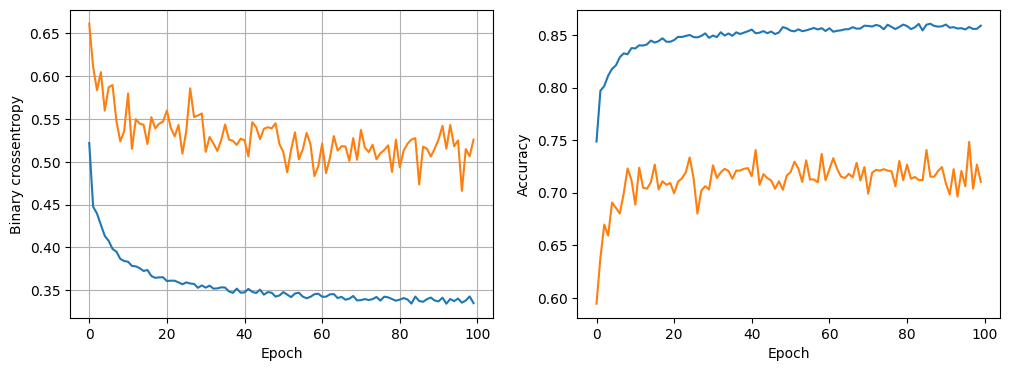

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8728
16: nodes, 0.2: dropout, 0.001: learning_rate, 64: batch_size


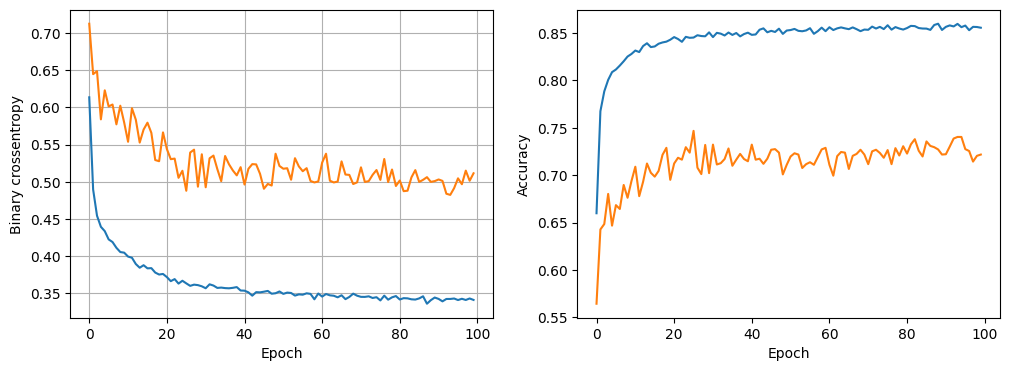

119/119 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8680
16: nodes, 0.2: dropout, 0.001: learning_rate, 128: batch_size


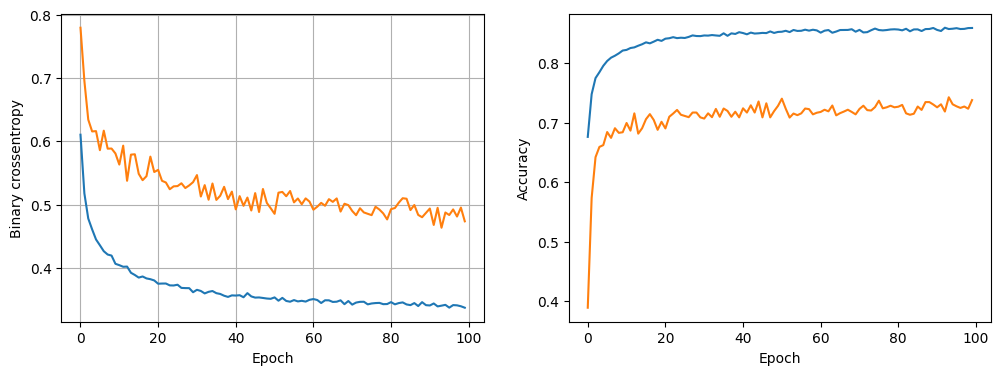

119/119 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8701
32: nodes, 0: dropout, 0.01: learning_rate, 32: batch_size


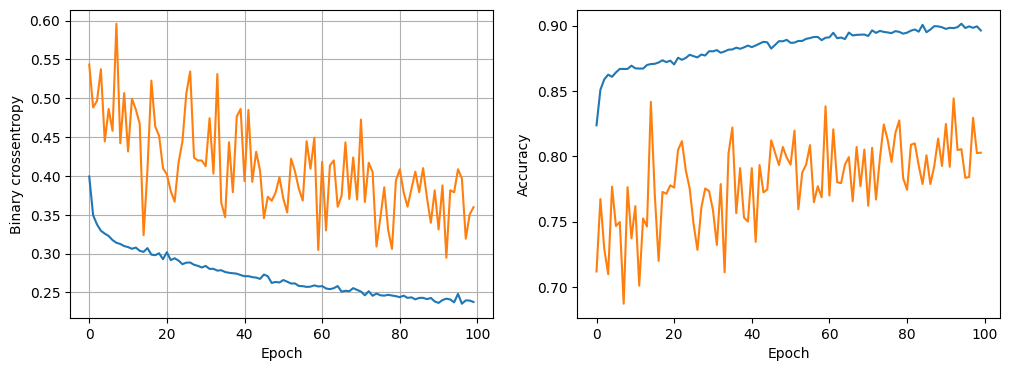

119/119 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8638
32: nodes, 0: dropout, 0.01: learning_rate, 64: batch_size


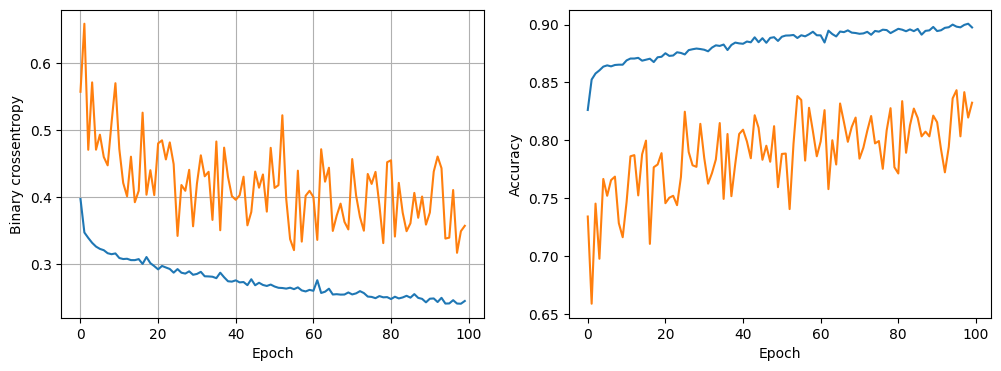

119/119 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8670
32: nodes, 0: dropout, 0.01: learning_rate, 128: batch_size


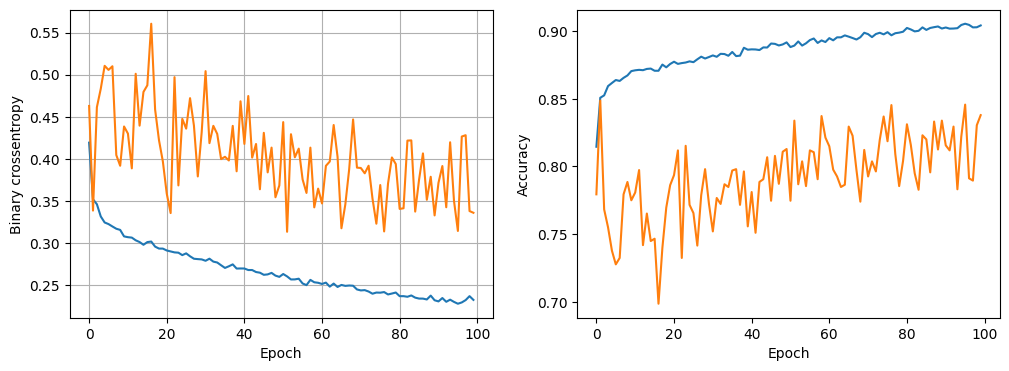

119/119 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8691
32: nodes, 0: dropout, 0.005: learning_rate, 32: batch_size


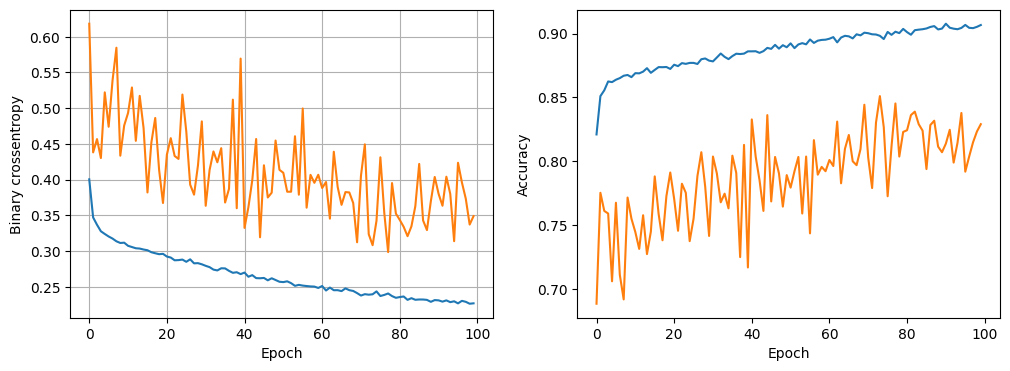

119/119 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8709
32: nodes, 0: dropout, 0.005: learning_rate, 64: batch_size


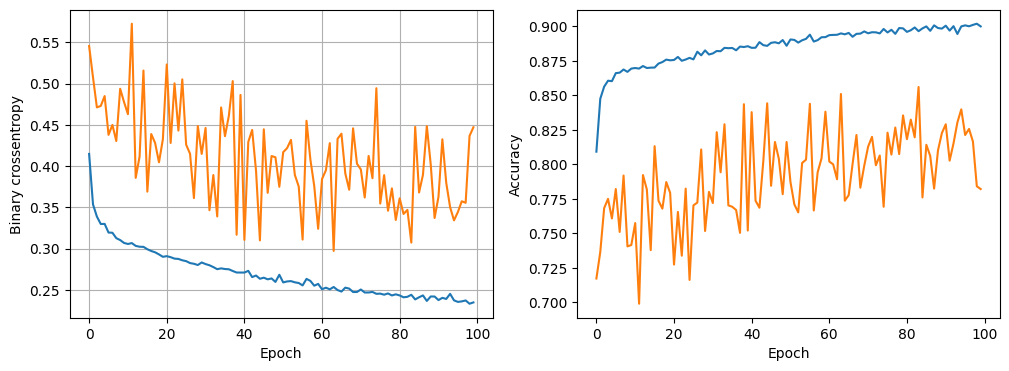

119/119 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8746
32: nodes, 0: dropout, 0.005: learning_rate, 128: batch_size


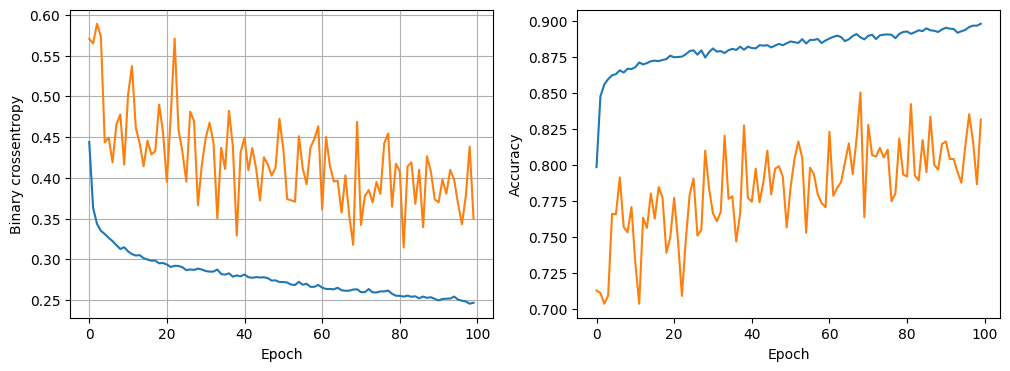

119/119 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8741
32: nodes, 0: dropout, 0.001: learning_rate, 32: batch_size


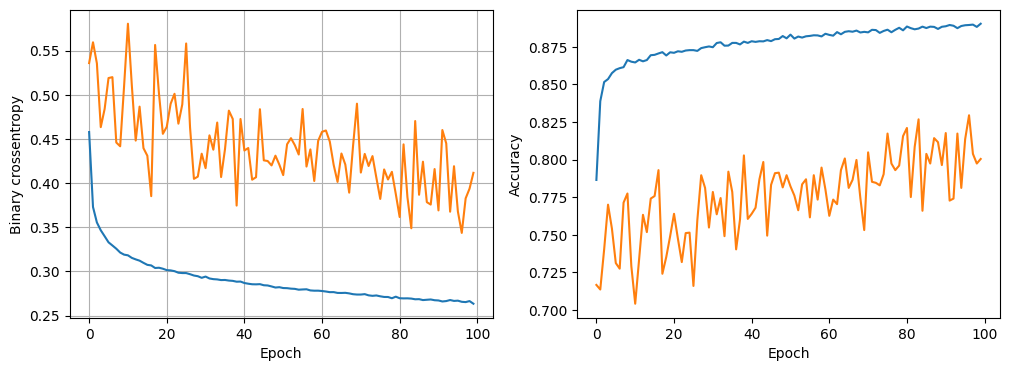

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8730
32: nodes, 0: dropout, 0.001: learning_rate, 64: batch_size


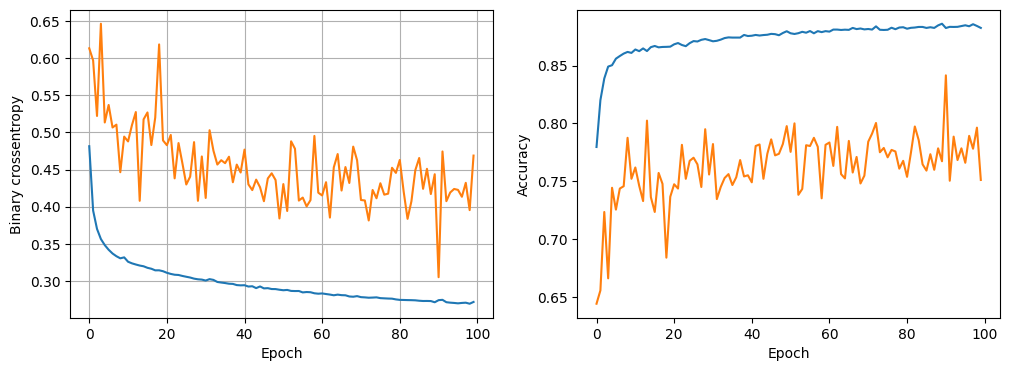

119/119 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8814
32: nodes, 0: dropout, 0.001: learning_rate, 128: batch_size


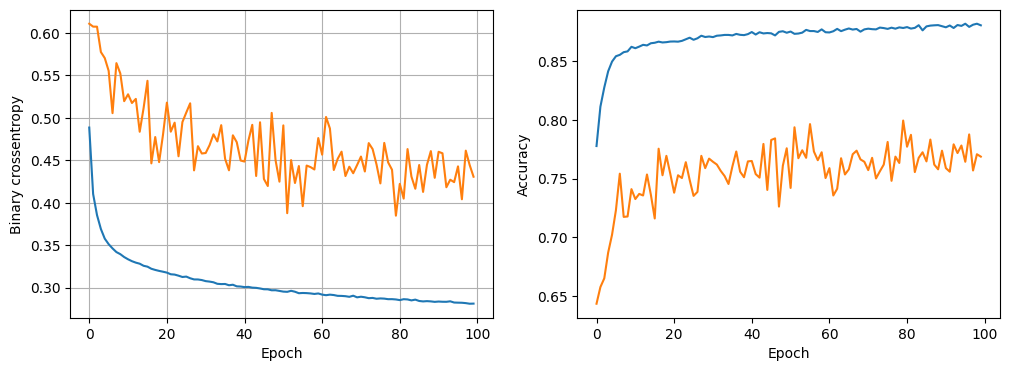

119/119 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8749
32: nodes, 0.2: dropout, 0.01: learning_rate, 32: batch_size


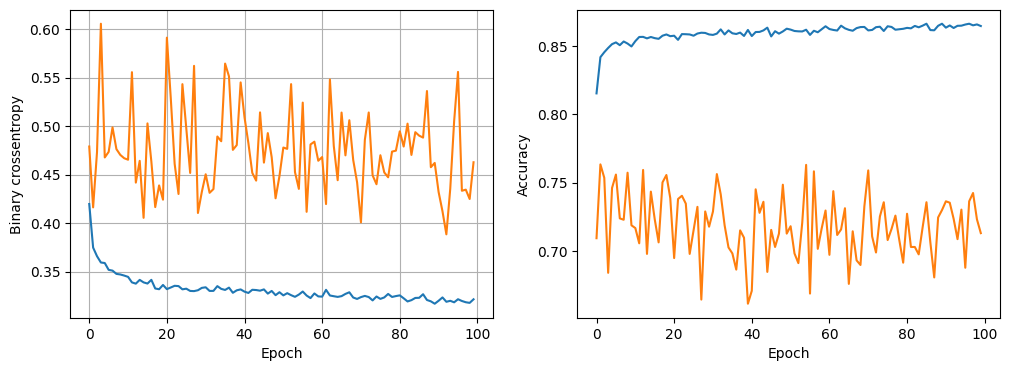

119/119 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8764
32: nodes, 0.2: dropout, 0.01: learning_rate, 64: batch_size


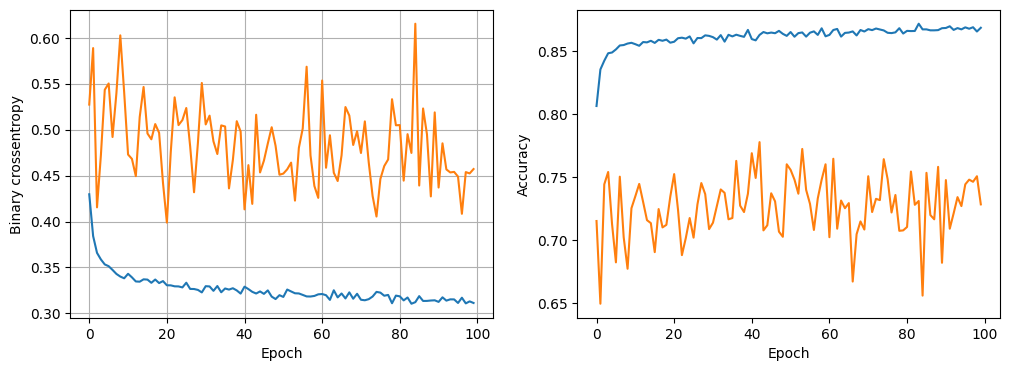

119/119 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8783
32: nodes, 0.2: dropout, 0.01: learning_rate, 128: batch_size


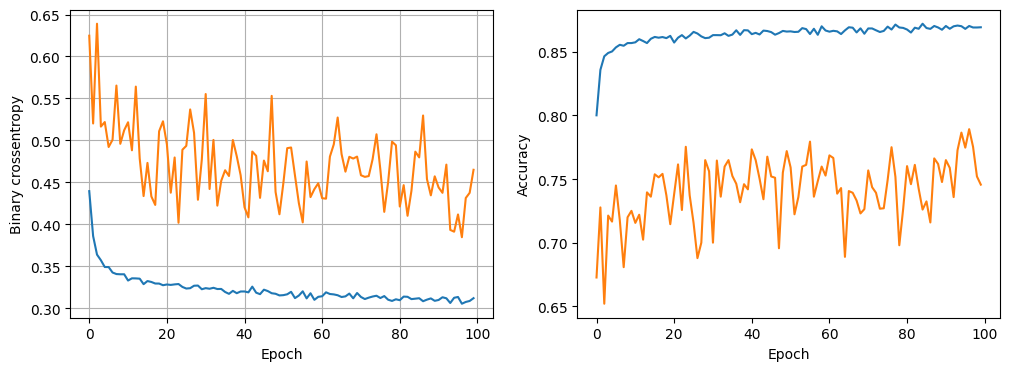

119/119 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8764
32: nodes, 0.2: dropout, 0.005: learning_rate, 32: batch_size


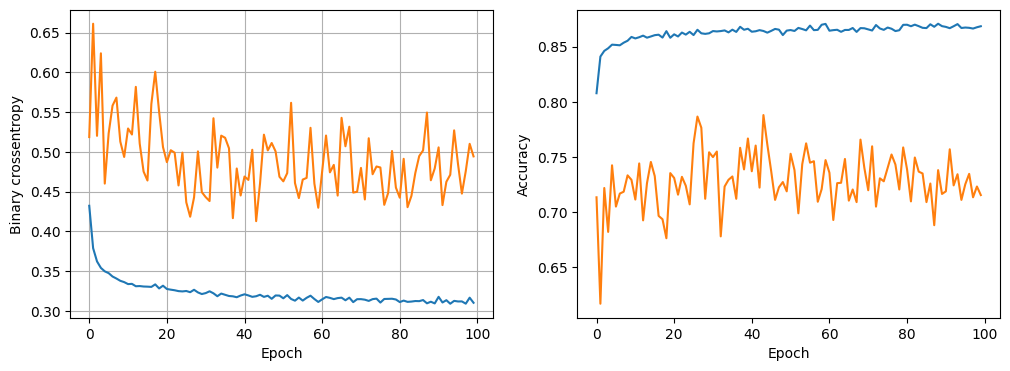

119/119 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.8738
32: nodes, 0.2: dropout, 0.005: learning_rate, 64: batch_size


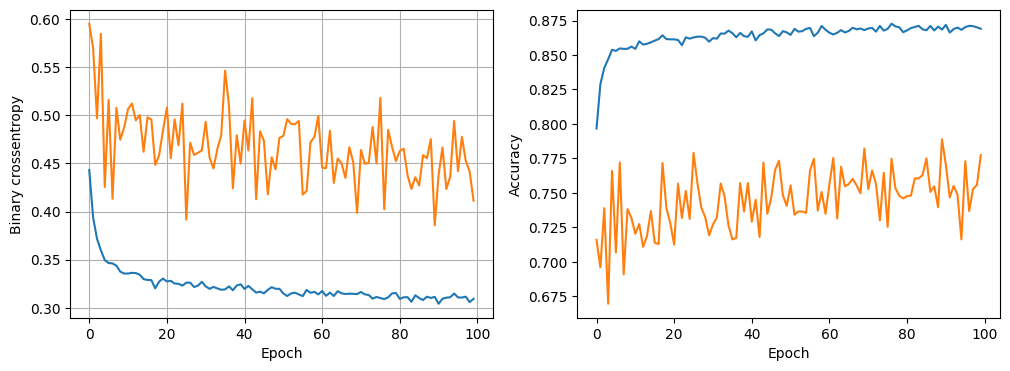

119/119 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.8780
32: nodes, 0.2: dropout, 0.005: learning_rate, 128: batch_size


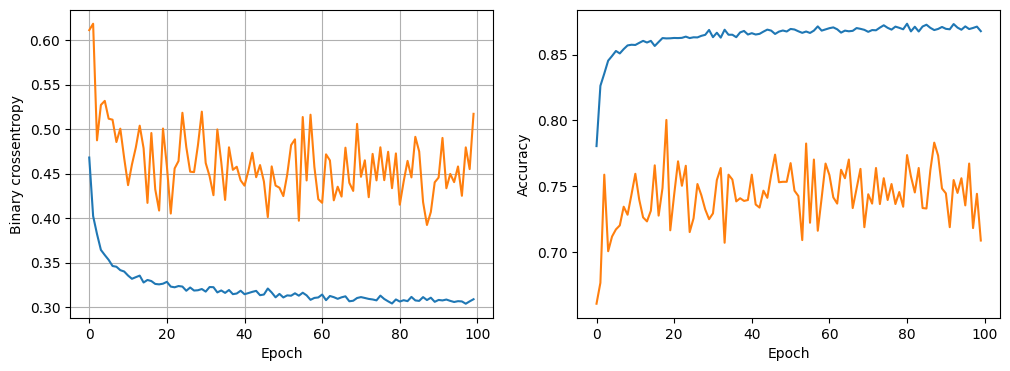

119/119 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8728
32: nodes, 0.2: dropout, 0.001: learning_rate, 32: batch_size


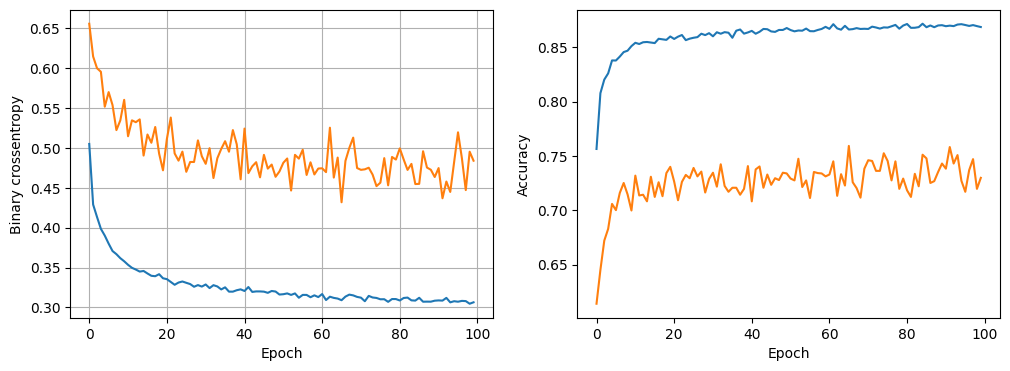

119/119 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8785
32: nodes, 0.2: dropout, 0.001: learning_rate, 64: batch_size


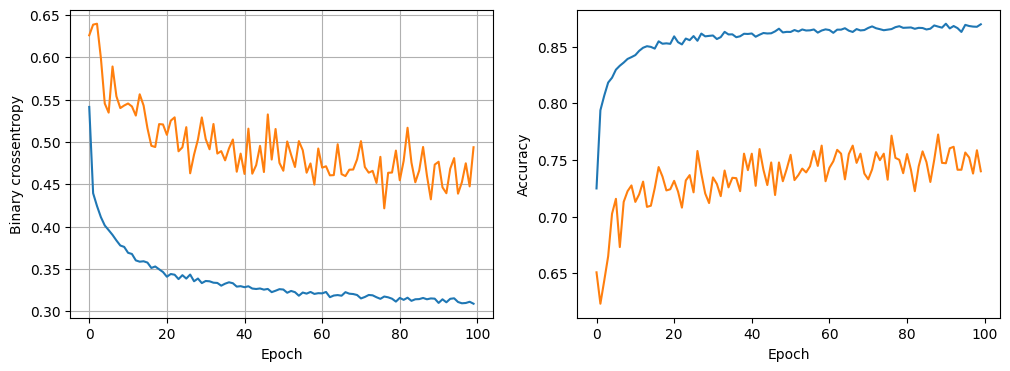

119/119 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8757
32: nodes, 0.2: dropout, 0.001: learning_rate, 128: batch_size


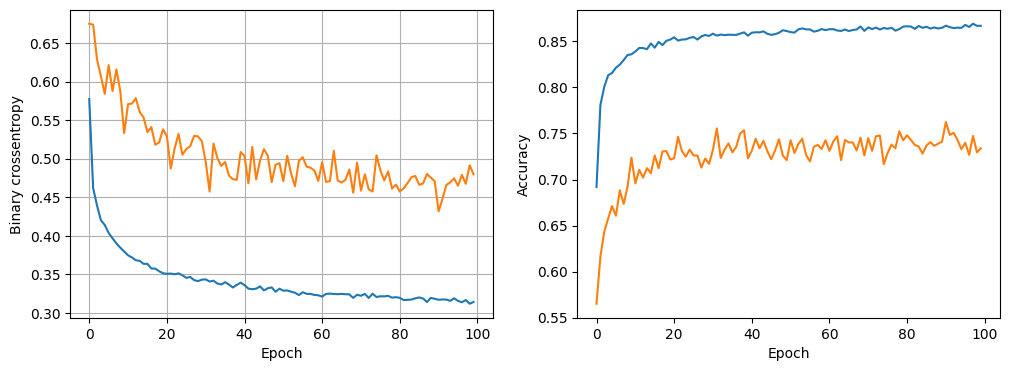

119/119 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8738
64: nodes, 0: dropout, 0.01: learning_rate, 32: batch_size


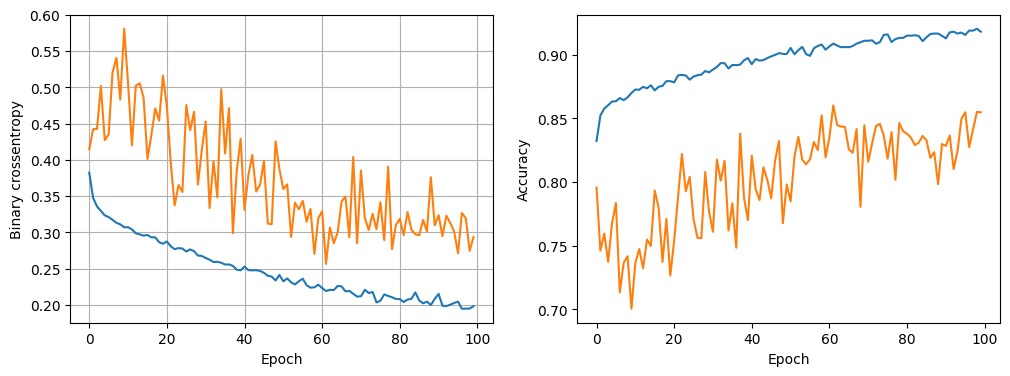

119/119 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.8580
64: nodes, 0: dropout, 0.01: learning_rate, 64: batch_size


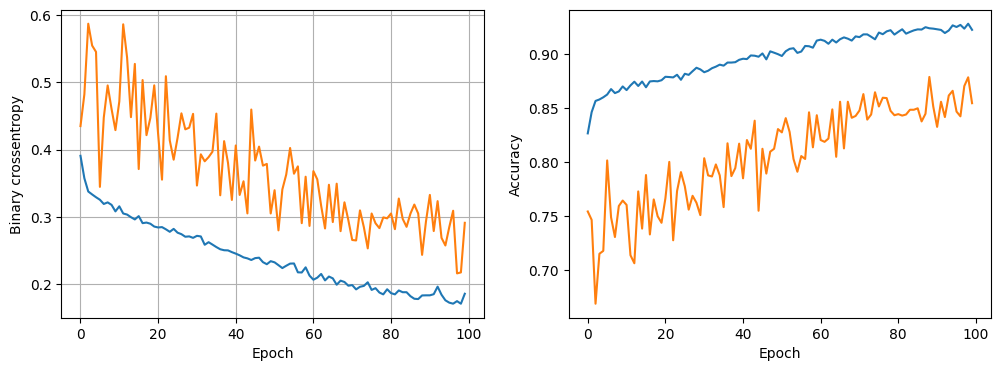

119/119 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.8575
64: nodes, 0: dropout, 0.01: learning_rate, 128: batch_size


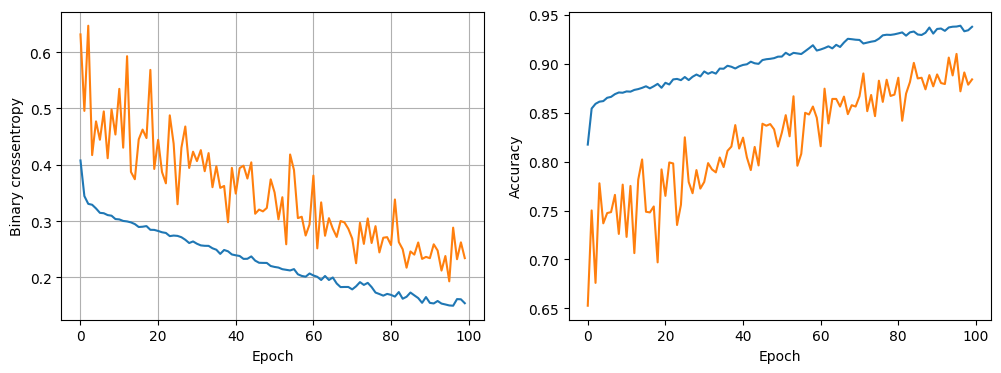

119/119 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.8683
64: nodes, 0: dropout, 0.005: learning_rate, 32: batch_size


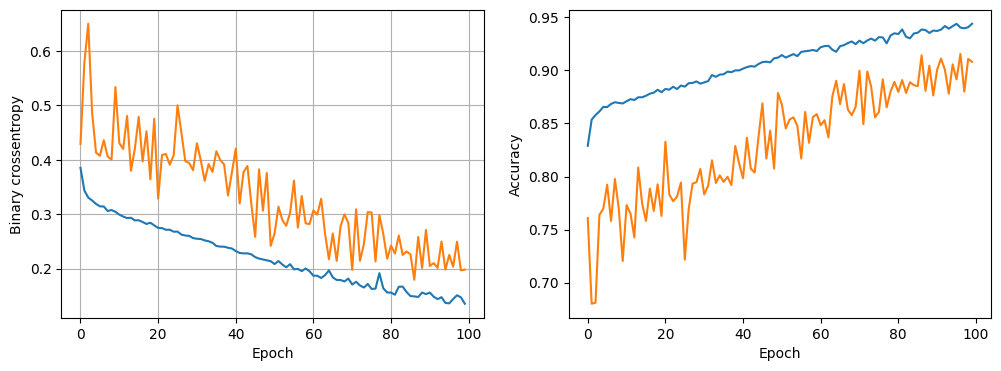

119/119 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.8594
64: nodes, 0: dropout, 0.005: learning_rate, 64: batch_size


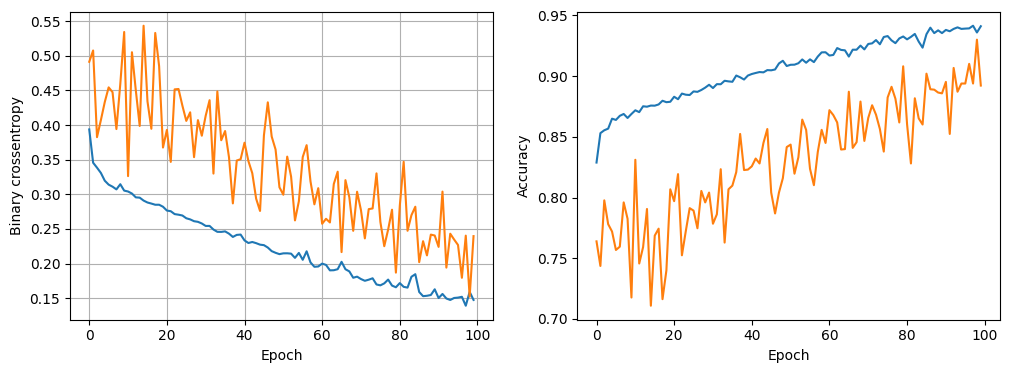

119/119 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.8586
64: nodes, 0: dropout, 0.005: learning_rate, 128: batch_size


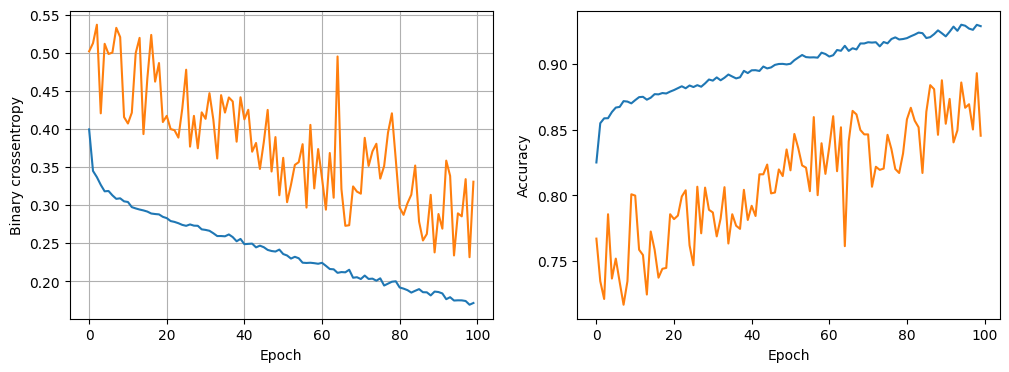

119/119 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8657
64: nodes, 0: dropout, 0.001: learning_rate, 32: batch_size


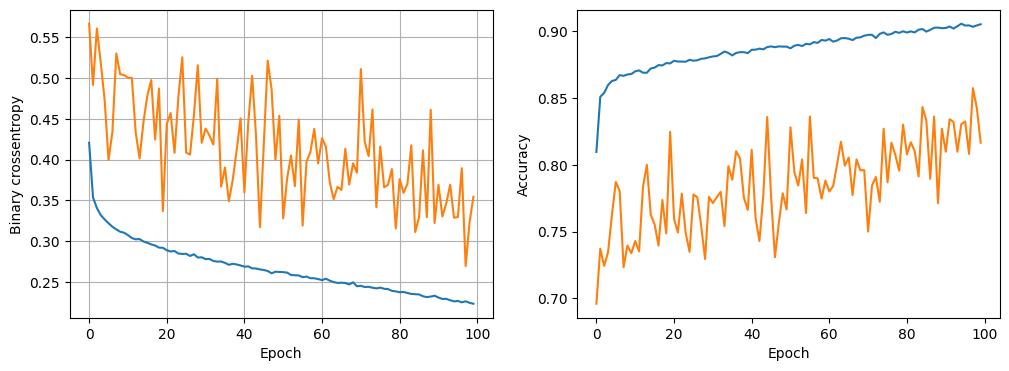

119/119 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8741
64: nodes, 0: dropout, 0.001: learning_rate, 64: batch_size


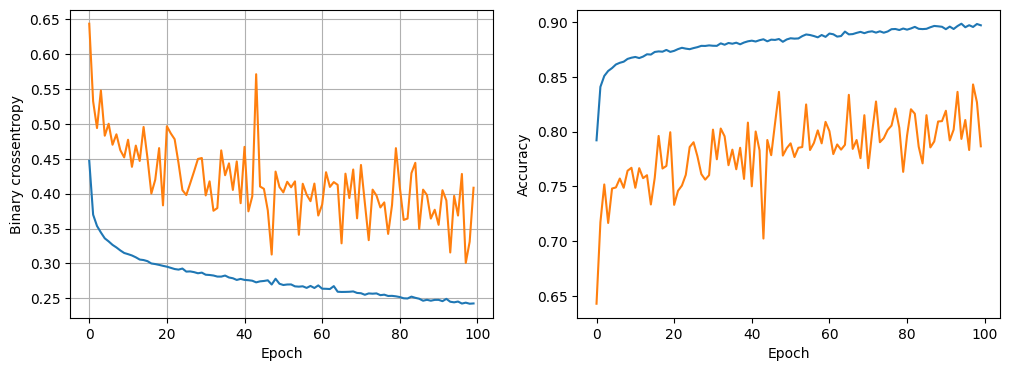

119/119 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8754
64: nodes, 0: dropout, 0.001: learning_rate, 128: batch_size


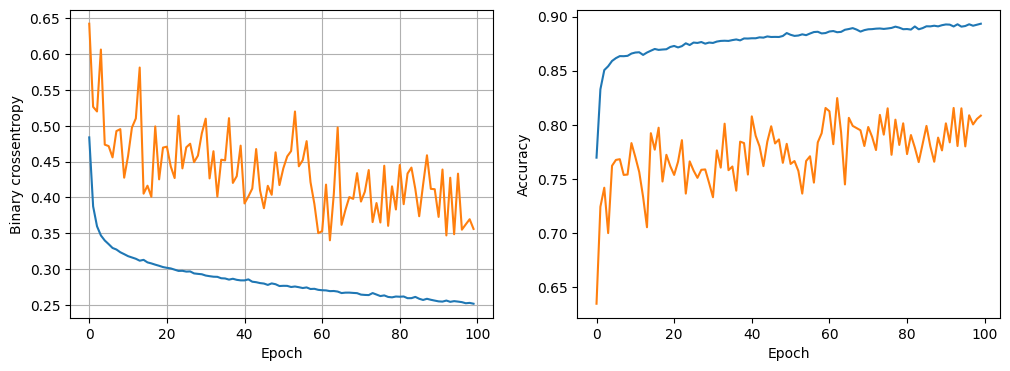

119/119 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8778
64: nodes, 0.2: dropout, 0.01: learning_rate, 32: batch_size


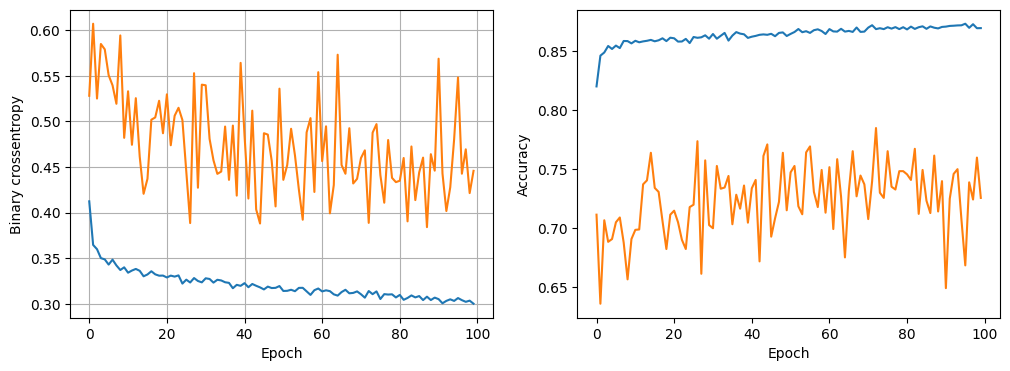

119/119 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8757
64: nodes, 0.2: dropout, 0.01: learning_rate, 64: batch_size


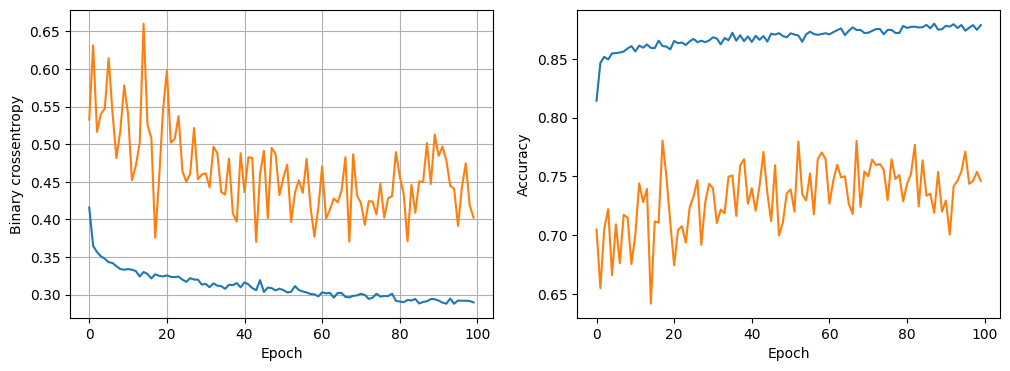

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8757
64: nodes, 0.2: dropout, 0.01: learning_rate, 128: batch_size


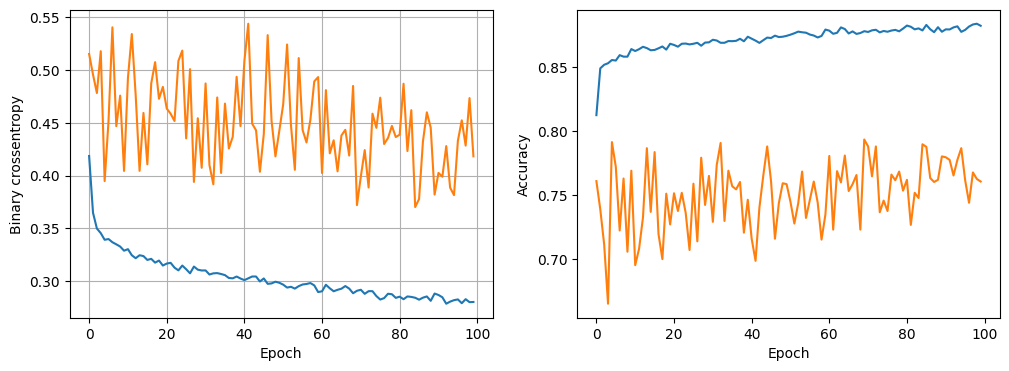

119/119 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.8785
64: nodes, 0.2: dropout, 0.005: learning_rate, 32: batch_size


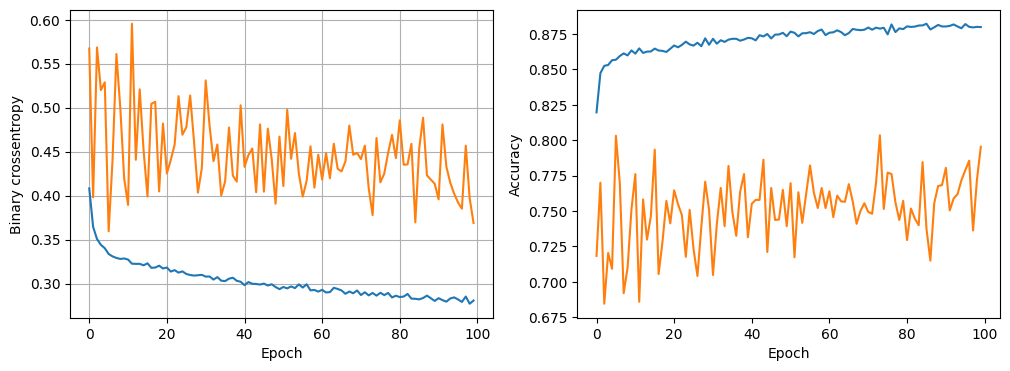

119/119 [==============================] - 0s 3ms/step - loss: 0.2918 - accuracy: 0.8807
64: nodes, 0.2: dropout, 0.005: learning_rate, 64: batch_size


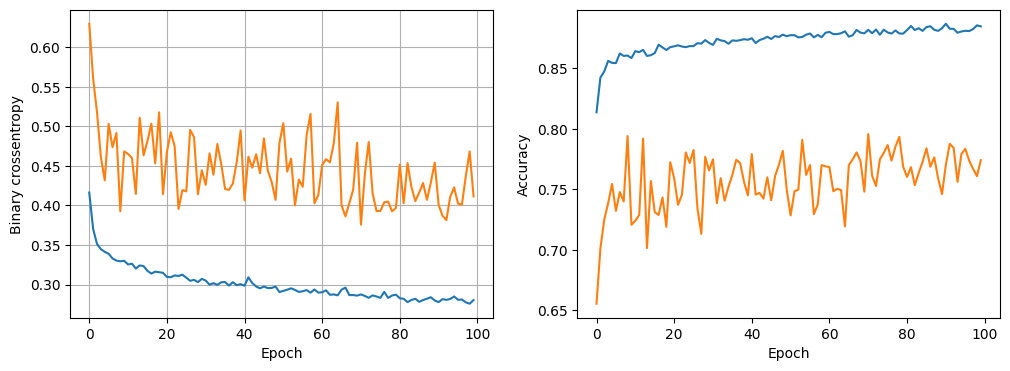

119/119 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8783
64: nodes, 0.2: dropout, 0.005: learning_rate, 128: batch_size


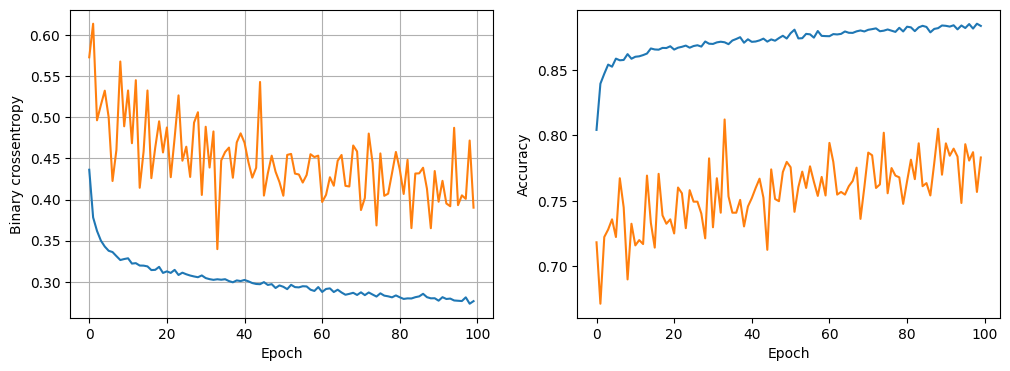

119/119 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8877
64: nodes, 0.2: dropout, 0.001: learning_rate, 32: batch_size


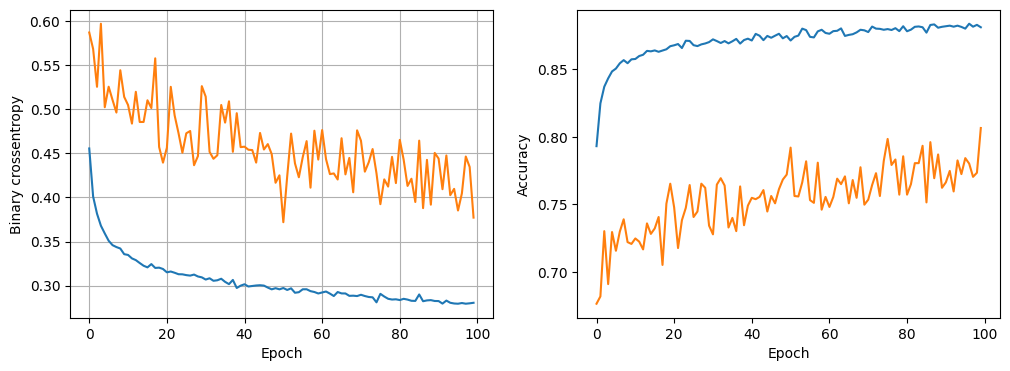

119/119 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.8830
64: nodes, 0.2: dropout, 0.001: learning_rate, 64: batch_size


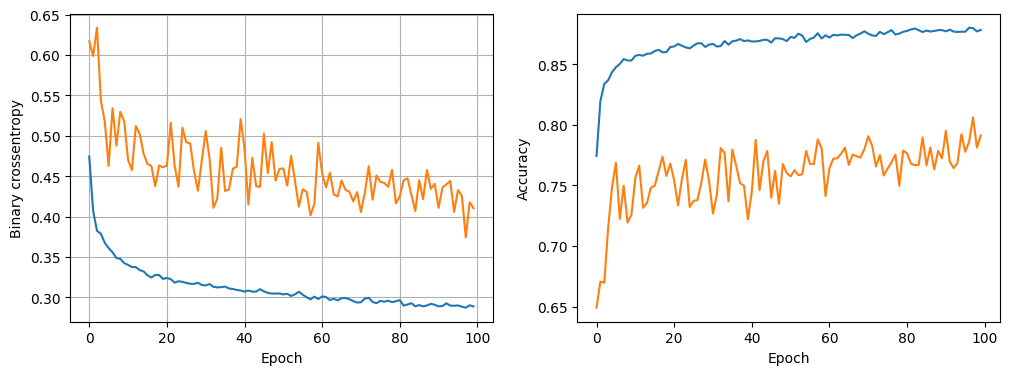

119/119 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8804
64: nodes, 0.2: dropout, 0.001: learning_rate, 128: batch_size


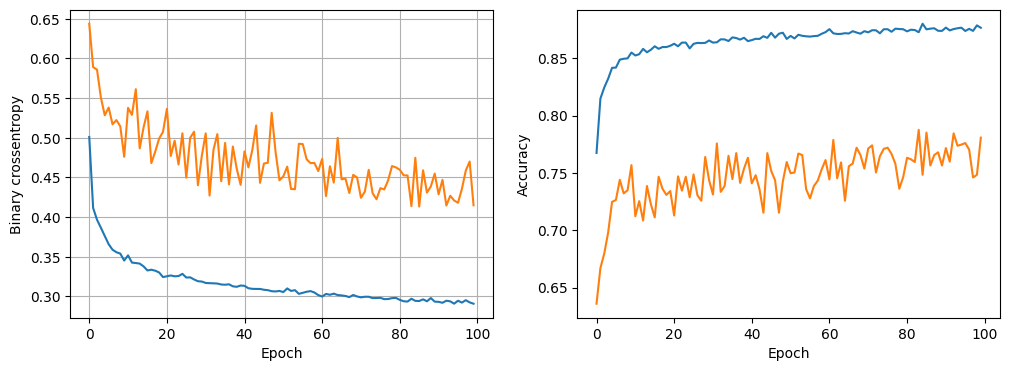

119/119 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.8801


In [ ]:
least_validation_loss = float("inf")
least_loss_model = None

epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for learning_rate in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes}: nodes, {dropout_prob}: dropout, {learning_rate}: learning_rate, {batch_size}: batch_size")
        model, history = train_nn_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
        plot_history(history)
        
        val_loss = model.evaluate(X_valid, y_valid)[0]
        #print(val_loss)
        
        if val_loss < least_validation_loss:
          least_validation_loss = val_loss
          least_loss_model = model



In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, 1)

print(classification_report(y_test, y_pred))

119/119 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1341
           1       0.89      0.92      0.90      2463

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

